In [51]:
import pandas as pd
from matplotlib import *
from pylab import *
from scipy.stats import linregress

In [44]:
df = pd.read_csv('officialData.csv')

In [45]:
df = df[['full_name','year','eviction-rate']].sort_values(['full_name','year'])

In [46]:
df = df.dropna()

In [47]:
df = df[df.year>2011].set_index('full_name',drop=False)

In [48]:
df.head()

,full_name,year,eviction-rate
full_name,,,
Abbeville County-South Carolina,Abbeville County-South Carolina,2012,0.13
Abbeville County-South Carolina,Abbeville County-South Carolina,2013,2.47
Abbeville County-South Carolina,Abbeville County-South Carolina,2014,2.28
Abbeville County-South Carolina,Abbeville County-South Carolina,2015,3.26
Abbeville County-South Carolina,Abbeville County-South Carolina,2016,6.48


In [50]:
example = df[df.full_name=='Abbeville County-South Carolina']

In [76]:
def getSlope(countyData):
    county = countyData.full_name.unique()[0]
    slope = linregress(countyData.year,countyData['eviction-rate']).slope
    if slope>0:
        return "up"
    elif slope == 0:
        return "no change"
    else:
        return "down"

In [77]:
results = df.groupby(level=[0],sort=False).apply(lambda x:getSlope(x))

C:\Users\evan.lynch\AppData\Local\conda\conda\envs\my_root\lib\site-packages\scipy\stats\_stats_mstats_common.py:106: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\evan.lynch\AppData\Local\conda\conda\envs\my_root\lib\site-packages\scipy\stats\_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\evan.lynch\AppData\Local\conda\conda\envs\my_root\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\evan.lynch\AppData\Local\conda\conda\envs\my_root\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\evan.lynch\AppData\Local\conda\conda\envs\my_root\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encoun

In [78]:
results

full_name
Abbeville County-South Carolina            up
Acadia Parish-Louisiana                    up
Accomack County-Virginia                 down
Ada County-Idaho                         down
Adair County-Iowa                        down
Adair County-Kentucky                    down
Adair County-Missouri                    down
Adair County-Oklahoma                      up
Adams County-Colorado                    down
Adams County-Idaho                       down
Adams County-Illinois                    down
Adams County-Indiana                       up
Adams County-Iowa                        down
Adams County-Mississippi                 down
Adams County-Nebraska                      up
Adams County-Ohio                          up
Adams County-Pennsylvania                down
Adams County-Washington                    up
Adams County-Wisconsin                   down
Addison County-Vermont                     up
Aiken County-South Carolina                up
Aitkin County-Minnesota 

In [84]:
pd.DataFrame(results).to_csv('ER_Trends.csv')

In [68]:
from matplotlib.pyplot import scatter

In [81]:
county = 'Wyoming County-West Virginia'

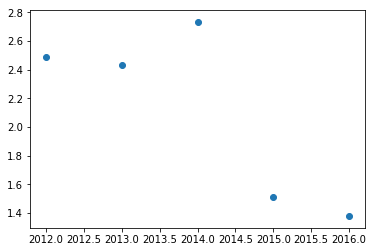

In [82]:
scatter(df.year[df.full_name==county],df['eviction-rate'][df.full_name==county])
plt.show()

In [72]:
linregress(df.year[df.full_name=='Zavala County-Texas'],df['eviction-rate'][df.full_name=='Zavala County-Texas']).slope

0.0